<a href="https://colab.research.google.com/github/pedrofigueroaalbano/IS-4487/blob/main/Lab_Week%2311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [101]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [102]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [103]:
df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/daily_aqi_by_county_2021.csv')

In [104]:
#look at the top rows
df.head(10) 

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2021-01-01,27,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2021-01-04,47,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2021-01-07,24,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2021-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2021-01-13,46,Good,PM2.5,01-003-0010,1
5,Alabama,Baldwin,1,3,2021-01-16,21,Good,PM2.5,01-003-0010,1
6,Alabama,Baldwin,1,3,2021-01-19,52,Moderate,PM2.5,01-003-0010,1
7,Alabama,Baldwin,1,3,2021-01-22,11,Good,PM2.5,01-003-0010,1
8,Alabama,Baldwin,1,3,2021-01-25,39,Good,PM2.5,01-003-0010,1
9,Alabama,Baldwin,1,3,2021-01-28,22,Good,PM2.5,01-003-0010,1


In [105]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218196 entries, 0 to 218195
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 218196 non-null  object
 1   county Name                218196 non-null  object
 2   State Code                 218196 non-null  int64 
 3   County Code                218196 non-null  int64 
 4   Date                       218196 non-null  object
 5   AQI                        218196 non-null  int64 
 6   Category                   218196 non-null  object
 7   Defining Parameter         218196 non-null  object
 8   Defining Site              218196 non-null  object
 9   Number of Sites Reporting  218196 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.6+ MB


In [106]:
#describe the data before cleaning it
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,218196.000000,218196.000000,218196.000000,218196.000000
mean,30.178390,82.098265,39.584250,1.924220
std,15.755914,89.555906,21.547055,2.251967
min,1.000000,1.000000,0.000000,1.000000
25%,18.000000,25.000000,29.000000,1.000000
50%,30.000000,61.000000,38.000000,1.000000
75%,42.000000,111.000000,47.000000,2.000000
max,80.000000,810.000000,2723.000000,34.000000


## Clean up the data

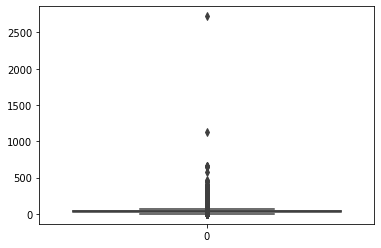

In [107]:
mpl.pyplot.figure(figsize=(6,4))
sns.boxplot(df['AQI'])
mpl.pyplot.show()

# There are a few big outliers over 1000.

In [108]:
df_clean = df[(df['AQI'] < 1000)]

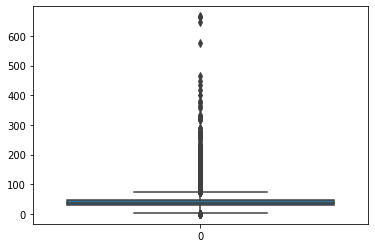

In [109]:
mpl.pyplot.figure(figsize=(6,4))
sns.boxplot(df_clean['AQI'])
mpl.pyplot.show()


# Standardize attributes

- Convert Defining Parameter column to true or false columns


In [110]:
df_clean.loc[df_clean['Category'] == 'Good', 'Category'] = "1"
df_clean.loc[df_clean['Category'] == 'Moderate', 'Category'] = "2"
df_clean.loc[df_clean['Category'] == 'Unhealthy for Sensitive Groups', 'Category'] = "3" 
df_clean.loc[df_clean['Category'] == 'Unhealthy', 'Category'] = "4"
df_clean.loc[df_clean['Category'] == 'Hazardous', 'Category'] = "5" 
df_clean.loc[df_clean['Category'] == 'Very Unhealthy', 'Category'] = "6"

In [111]:
#Get distinct values
df_clean['Defining Parameter'].unique() 

array(['PM2.5', 'Ozone', 'PM10', 'NO2', 'CO', 'SO2'], dtype=object)

In [112]:
df_clean.loc[df_clean['Defining Parameter'] == 'Ozone', 'Ozone'] = "1"
df_clean.loc[df_clean['Defining Parameter'] == 'PM2.5', 'PM2.5'] = "1"
df_clean.loc[df_clean['Defining Parameter'] == 'PM10', 'PM10'] = "1" 
df_clean.loc[df_clean['Defining Parameter'] == 'NO2', 'NO2'] = "1"
df_clean.loc[df_clean['Defining Parameter'] == 'CO', 'CO'] = "1" 
df_clean.loc[df_clean['Defining Parameter'] == 'SO2', 'SO2'] = "1"

df_clean.loc[df_clean['Ozone'].isnull(), 'Ozone'] = "0"
df_clean.loc[df_clean['PM2.5'].isnull(), 'PM2.5'] = "0"
df_clean.loc[df_clean['PM10'].isnull(), 'PM10'] = "0" 
df_clean.loc[df_clean['NO2'].isnull(), 'NO2'] = "0"
df_clean.loc[df_clean['CO'].isnull(), 'CO'] = "0" 
df_clean.loc[df_clean['SO2'].isnull(), 'SO2'] = "0"
df_clean.head(10) 

<ipython-input-112-d99a84dc4dbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['Defining Parameter'] == 'Ozone', 'Ozone'] = "1"
<ipython-input-112-d99a84dc4dbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['Defining Parameter'] == 'PM2.5', 'PM2.5'] = "1"
<ipython-input-112-d99a84dc4dbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Ozone,PM2.5,PM10,NO2,CO,SO2
0,Alabama,Baldwin,1,3,2021-01-01,27,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
1,Alabama,Baldwin,1,3,2021-01-04,47,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
2,Alabama,Baldwin,1,3,2021-01-07,24,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
3,Alabama,Baldwin,1,3,2021-01-10,39,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
4,Alabama,Baldwin,1,3,2021-01-13,46,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
5,Alabama,Baldwin,1,3,2021-01-16,21,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
6,Alabama,Baldwin,1,3,2021-01-19,52,2,PM2.5,01-003-0010,1,0,1,0,0,0,0
7,Alabama,Baldwin,1,3,2021-01-22,11,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
8,Alabama,Baldwin,1,3,2021-01-25,39,1,PM2.5,01-003-0010,1,0,1,0,0,0,0
9,Alabama,Baldwin,1,3,2021-01-28,22,1,PM2.5,01-003-0010,1,0,1,0,0,0,0


### Convert to INT

In [113]:
df_clean['Ozone'] = df_clean['Ozone'].astype('int') 
df_clean['PM2.5'] = df_clean['PM2.5'].astype('int') 
df_clean['PM10'] = df_clean['PM10'].astype('int') 
df_clean['NO2'] = df_clean['NO2'].astype('int') 
df_clean['CO'] = df_clean['CO'].astype('int') 
df_clean['SO2'] = df_clean['SO2'].astype('int') 

<ipython-input-113-6325576e73ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ozone'] = df_clean['Ozone'].astype('int')
<ipython-input-113-6325576e73ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PM2.5'] = df_clean['PM2.5'].astype('int')
<ipython-input-113-6325576e73ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [114]:
df_clean = df_clean.drop(columns=['Defining Parameter'])

# Convert attributes to factors

- Category
- Defining Parameters

In [115]:
#Method #1
#df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df_clean['Category'] = df_clean['Category'].astype('category')
df_clean['Ozone'] = df_clean['Ozone'].astype('category') 
df_clean['PM2.5'] = df_clean['PM2.5'].astype('category') 
df_clean['PM10'] = df_clean['PM10'].astype('category') 
df_clean['NO2'] = df_clean['NO2'].astype('category') 
df_clean['CO'] = df_clean['CO'].astype('category') 
df_clean['SO2'] = df_clean['SO2'].astype('category') 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218194 entries, 0 to 218195
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State Name                 218194 non-null  object  
 1   county Name                218194 non-null  object  
 2   State Code                 218194 non-null  int64   
 3   County Code                218194 non-null  int64   
 4   Date                       218194 non-null  object  
 5   AQI                        218194 non-null  int64   
 6   Category                   218194 non-null  category
 7   Defining Site              218194 non-null  object  
 8   Number of Sites Reporting  218194 non-null  int64   
 9   Ozone                      218194 non-null  category
 10  PM2.5                      218194 non-null  category
 11  PM10                       218194 non-null  category
 12  NO2                        218194 non-null  category
 13  CO            

# Include only Salt Lake County

In [116]:
df_clean = df_clean.loc[df_clean['county Name'] == "Salt Lake"]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 193138 to 193442
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   State Name                 305 non-null    object  
 1   county Name                305 non-null    object  
 2   State Code                 305 non-null    int64   
 3   County Code                305 non-null    int64   
 4   Date                       305 non-null    object  
 5   AQI                        305 non-null    int64   
 6   Category                   305 non-null    category
 7   Defining Site              305 non-null    object  
 8   Number of Sites Reporting  305 non-null    int64   
 9   Ozone                      305 non-null    category
 10  PM2.5                      305 non-null    category
 11  PM10                       305 non-null    category
 12  NO2                        305 non-null    category
 13  CO                         

## Calculate distribution of the outcome  


In [142]:
# Distribution of outcomes 

df_outcomes = df.loc[df['county Name'] == "Salt Lake"]
df_outcomes['Category'].value_counts()
df_outcomes['Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


Good                              43.6%
Moderate                          41.0%
Unhealthy for Sensitive Groups    12.5%
Unhealthy                          3.0%
Name: Category, dtype: object

## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree." 

What is the accuracy of the money tree? 

In [136]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['Ozone','PM2.5','PM10','NO2','CO','SO2','Number of Sites Reporting']]
y = df_clean['Category']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)


## Preview the tree


In [137]:
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_6 <= 7.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_6 <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  6.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 2
|   |--- feature_1 >  0.50
|   |   |--- class: 2
|--- feature_6 >  7.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- class: 2
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 2
|   |--- feature_2 >  0.50
|   |   |--- class: 2



## Check Accuracy

What is the accuracy of the money_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [138]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.5344262295081967


## Prune the tree

Limit the number of levels to 2

In [139]:
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)


## Preview the new tree

In [140]:
money_tree2_text = tree.export_text(money_tree2)
print(money_tree2_text)

|--- feature_6 <= 7.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_6 <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  6.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 2
|   |--- feature_1 >  0.50
|   |   |--- class: 2
|--- feature_6 >  7.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 2
|   |--- feature_2 >  0.50
|   |   |--- class: 2



## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [141]:
pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.5344262295081967


## Visualize the model

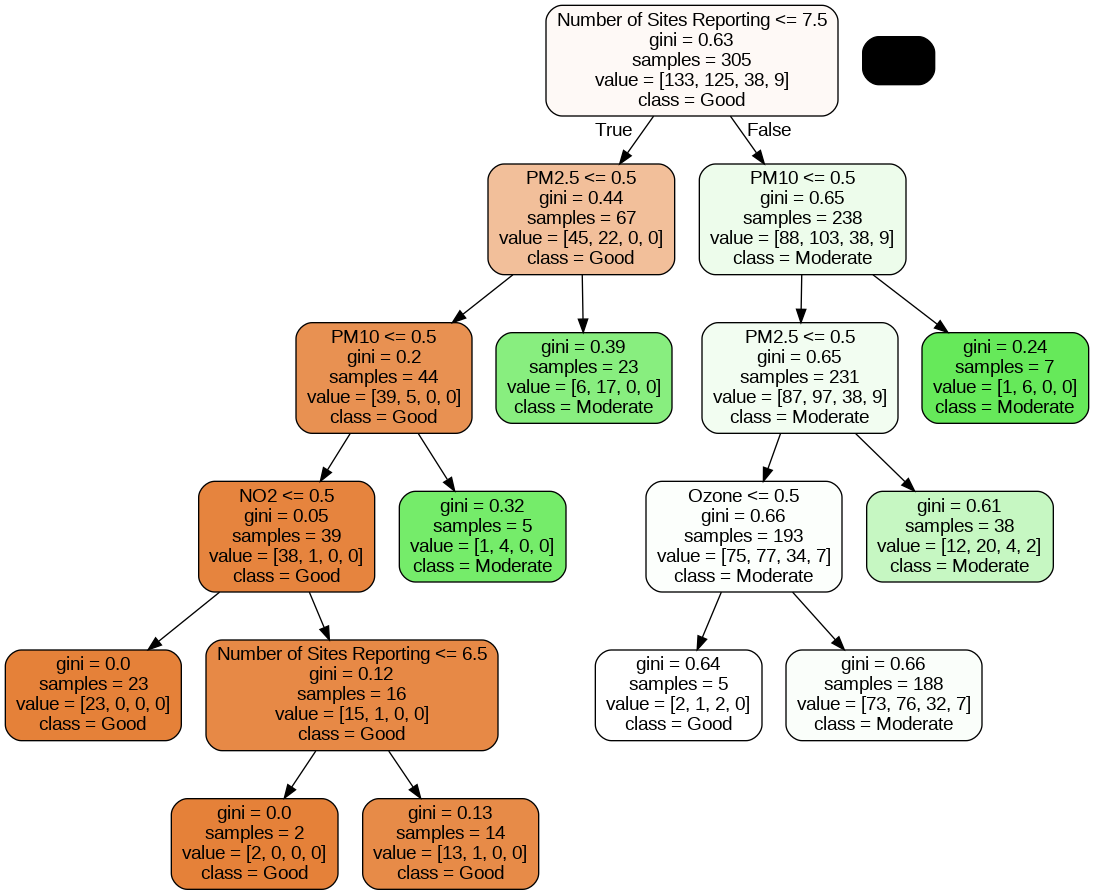

In [144]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['Good','Moderate','Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())